# Segmenting remote sensing imagery with text prompts and the Segment Anything Model (SAM)

[![image](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/opengeos/segment-geospatial/blob/main/docs/examples/text_prompts.ipynb)
[![image](https://img.shields.io/badge/Open-Planetary%20Computer-black?style=flat&logo=microsoft)](https://pccompute.westeurope.cloudapp.azure.com/compute/hub/user-redirect/git-pull?repo=https://github.com/opengeos/segment-geospatial&urlpath=lab/tree/segment-geospatial/docs/examples/text_prompts.ipynb&branch=main)
[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeos/segment-geospatial/blob/main/docs/examples/text_prompts.ipynb)

This notebook shows how to generate object masks from text prompts with the Segment Anything Model (SAM).

Make sure you use GPU runtime for this notebook. For Google Colab, go to `Runtime` -> `Change runtime type` and select `GPU` as the hardware accelerator.

# Code Reference from:
## https://samgeo.gishub.org/

## Install dependencies

Uncomment and run the following cell to install the required dependencies.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install xarray

In [ ]:
!pip install segment-geospatial

  Using cached segment_geospatial-0.10.2-py2.py3-none-any.whl (50 kB)
  Using cached segment_anything_py-1.0-py3-none-any.whl (40 kB)
  Using cached localtileserver-0.10.1-py3-none-any.whl (17.1 MB)
  Using cached pycocotools-2.0.7-cp39-cp39-win_amd64.whl (85 kB)
  Using cached segment_anything_hq-0.3-py3-none-any.whl (52 kB)
  Using cached geopandas-0.14.3-py3-none-any.whl (1.1 MB)
  Using cached shapely-2.0.3-cp39-cp39-win_amd64.whl (1.4 MB)
  Using cached fiona-1.9.5-cp39-cp39-win_amd64.whl (22.9 MB)
  Using cached flask-3.0.2-py3-none-any.whl (101 kB)
  Using cached server_thread-0.2.0-py3-none-any.whl (8.5 kB)
  Using cached Flask_Caching-2.1.0-py3-none-any.whl (28 kB)
  Using cached Flask_Cors-4.0.0-py2.py3-none-any.whl (14 kB)
  Using cached rio_tiler-6.4.1-py3-none-any.whl (262 kB)
  Using cached flask_restx-1.3.0-py2.py3-none-any.whl (2.8 MB)
  Using cached rio_cogeo-5.2.0-py3-none-any.whl (20 kB)
  Using cached aniso8601-9.0.1-py2.py3-none-any.whl (52 kB)
  Using cached impor

In [ ]:
!pip install GDAL-3.4.3-cp39-cp39-win_amd64.whl

Processing d:\irvin testing sam & unet\gdal-3.4.3-cp39-cp39-win_amd64.whl


In [ ]:
!pip install streamlit

In [ ]:
!pip install leafmap

  Using cached leafmap-0.31.3-py2.py3-none-any.whl (1.8 MB)
  Using cached plotly-5.19.0-py3-none-any.whl (15.7 MB)
  Using cached colour-0.1.5-py2.py3-none-any.whl (23 kB)
  Using cached geojson-3.1.0-py3-none-any.whl (15 kB)
  Using cached ipyleaflet-0.18.2-py3-none-any.whl (3.7 MB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
  Using cached pystac_client-0.7.6-py3-none-any.whl (33 kB)
  Using cached python_box-7.1.1-cp39-cp39-win_amd64.whl (1.2 MB)
  Using cached ipyfilechooser-0.6.0-py3-none-any.whl (11 kB)
  Using cached whiteboxgui-2.3.0-py2.py3-none-any.whl (108 kB)
  Using cached duckdb-0.10.0-cp39-cp39-win_amd64.whl (9.6 MB)
  Using cached folium-0.16.0-py2.py3-none-any.whl (100 kB)
  Using cached ipyevents-2.0.2-py3-none-any.whl (101 kB)
  Using cached gdown-5.1.0-py3-none-any.whl (17 kB)
  Using cached bqplot-0.12.43-py2.py3-none-any.whl (1.2 MB)
  Using cached branca-0.7.1-py3-none-any.whl (25 kB)
  Using cached ipytree-0.2.2-py2.py3-none-any.whl (1.3 MB)


In [ ]:
%pip install segment-geospatial groundingdino-py leafmap localtileserver

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\GeoAI-4\\anaconda3\\Lib\\site-packages\\~andas\\_libs\\algos.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached snuggs-1.4.7-py3-none-any.whl (5.4 kB)
  Created wheel for groundingdino-py: filename=groundingdino_py-0.4.0-py2.py3-none-any.whl size=88765 sha256=399fab89cc275401eb7ee47f6832aa5c92e9d68d7fda907e3328dba3ba03ece3
  Stored in directory: c:\users\geoai-4\appdata\local\pip\cache\wheels\a2\f3\de\082edc80139cfda8483ee8ce917ad4d1025318cf800595b5ac
Successfully built groundingdino-py
  Attempting uninstall: attrs
    Found existing installation: attrs 21.2.0
    Uninstalling attrs-21.2.0:
      Successfully uninstalled attrs-21.2.0
  Attempting uninstall: jsonschema
    Found existing installation: jsonschema 3.2.0
    Uninstalling jsonschema-3.2.0:
      Successfully uninstalled jsonschema-3.2.0
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1


In [ ]:
import leafmap
from samgeo import tms_to_geotiff
from samgeo.text_sam import LangSAM

## Create an interactive map

In [ ]:
m = leafmap.Map(center=[-6.170405, 106.915540], zoom=21, height="800px")

# -8.6983313, 115.1859232
m.add_basemap("SATELLITE")
m

## Download a sample image

Pan and zoom the map to select the area of interest. Use the draw tools to draw a polygon or rectangle on the map

In [ ]:
bbox = m.user_roi_bounds()
if bbox is None:
    bbox = [-51.2565, -22.1777, -51.2512, -22.175]

In [ ]:
image = './unet-hasil-crop-2.tif'
tms_to_geotiff(output=image, bbox=bbox, zoom=21, source="Satellite", overwrite=True)

Downloaded image 001/121
Downloaded image 002/121
Downloaded image 003/121
Downloaded image 004/121
Downloaded image 005/121
Downloaded image 006/121
Downloaded image 007/121
Downloaded image 008/121
Downloaded image 009/121
Downloaded image 010/121
Downloaded image 011/121
Downloaded image 012/121
Downloaded image 013/121
Downloaded image 014/121
Downloaded image 015/121
Downloaded image 016/121
Downloaded image 017/121
Downloaded image 018/121
Downloaded image 019/121
Downloaded image 020/121
Downloaded image 021/121
Downloaded image 022/121
Downloaded image 023/121
Downloaded image 024/121
Downloaded image 025/121
Downloaded image 026/121
Downloaded image 027/121
Downloaded image 028/121
Downloaded image 029/121
Downloaded image 030/121
Downloaded image 031/121
Downloaded image 032/121
Downloaded image 033/121
Downloaded image 034/121
Downloaded image 035/121
Downloaded image 036/121
Downloaded image 037/121
Downloaded image 038/121
Downloaded image 039/121
Downloaded image 040/121


You can also use your own image. Uncomment and run the following cell to use your own image.

In [ ]:
# image = 'drive/MyDrive/massachusetts-building-dataset/tiff/train/246.tif'
# image = 'drive/MyDrive/dataset_testing/testinghd246.tif'
# image = 'drive/MyDrive/dataset_testing/testinghd2.tif'
# image = 'drive/MyDrive/dataset_testing/R2C1_part_HD.tif'
# image = 'testinghd246full.tif'
# image = 'unet-hasil-crop-2.tif'
# image = 'test-unet.tiff'
# image = 'unet-hasil-crop.tif'
# image = 'generated.tif'
image = 'generated.tif'
image

'generated.tif'

Display the downloaded image on the map.

## Initialize LangSAM class

The initialization of the LangSAM class might take a few minutes. The initialization downloads the model weights and sets up the model for inference.

In [ ]:
sam = LangSAM()

final text_encoder_type: bert-base-uncased


## Specify text prompts

In [ ]:
text_prompt = "house"

## Segment the image

Part of the model prediction includes setting appropriate thresholds for object detection and text association with the detected objects. These threshold values range from 0 to 1 and are set while calling the predict method of the LangSAM class.

`box_threshold`: This value is used for object detection in the image. A higher value makes the model more selective, identifying only the most confident object instances, leading to fewer overall detections. A lower value, conversely, makes the model more tolerant, leading to increased detections, including potentially less confident ones.

`text_threshold`: This value is used to associate the detected objects with the provided text prompt. A higher value requires a stronger association between the object and the text prompt, leading to more precise but potentially fewer associations. A lower value allows for looser associations, which could increase the number of associations but also introduce less precise matches.

Remember to test different threshold values on your specific data. The optimal threshold can vary depending on the quality and nature of your images, as well as the specificity of your text prompts. Make sure to choose a balance that suits your requirements, whether that's precision or recall.

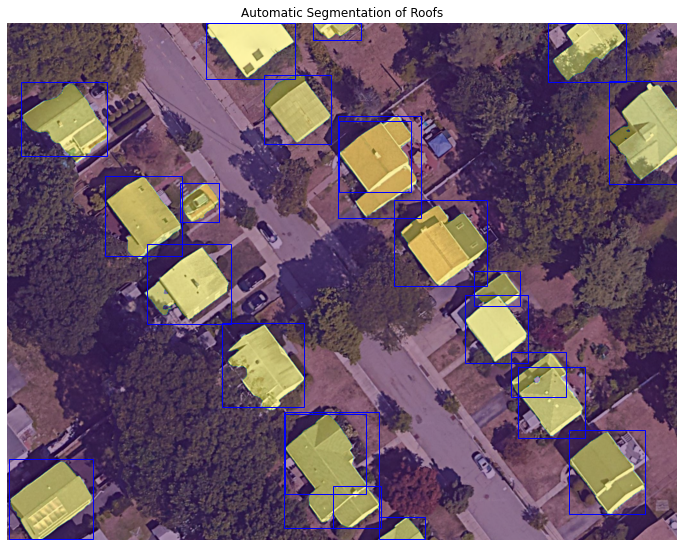

In [ ]:
# masks, boxes, phrases, logits =
sam.predict(image, text_prompt, box_threshold=0.29, text_threshold=0.4)
# sam.predict(image, text_prompt, box_threshold=0.1, text_threshold=0.1)
#,return_results=True
# print("Result masks",masks)
# print("Result boxes",len(boxes))
# print("Result phrases",phrases)
# print("Result logits",logits)


# coords = sam.predict(image, text_prompt, box_threshold=0.26, text_threshold=0.1,return_coords=True)
# print("Result coords",coords)
sam.show_anns(
    cmap='viridis',
    box_color='#0000ff',
    title='Automatic Segmentation of Roofs'
)

## Visualize the results

Show the result with bounding boxes on the map.

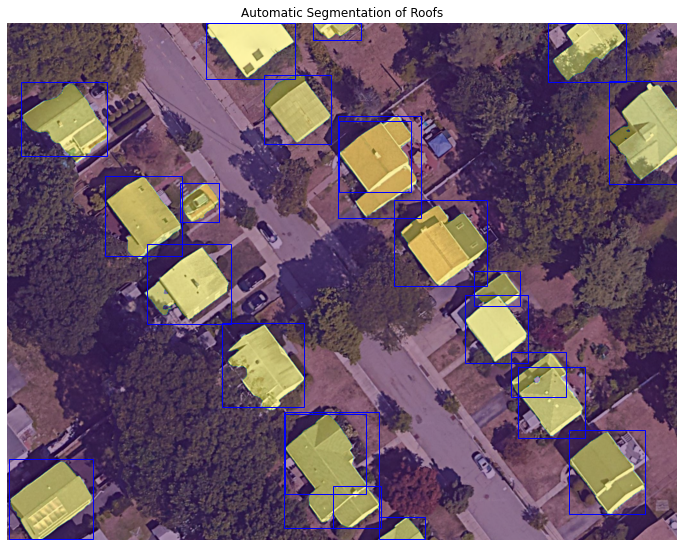

In [ ]:
sam.show_anns(
    cmap='viridis',
    box_color='#0000ff',
    title='Automatic Segmentation of Roofs'
)

Show the result without bounding boxes on the map.

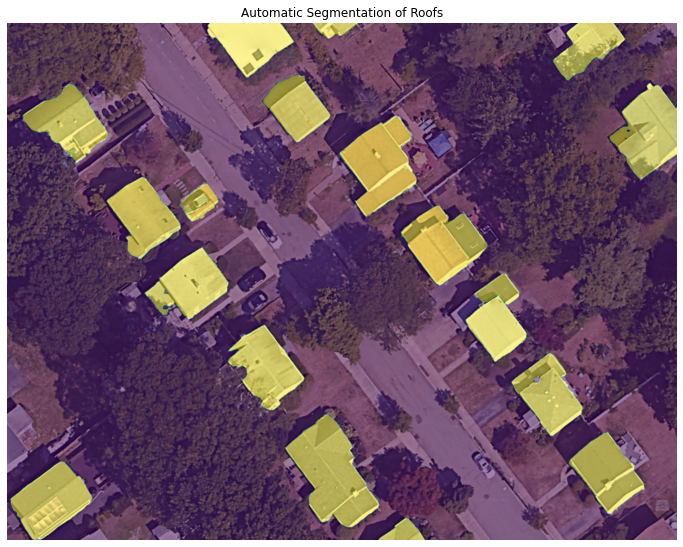

In [ ]:
sam.show_anns(
    cmap='viridis',
    add_boxes=False,
    alpha=0.5,
    title='Automatic Segmentation of Roofs',
)

Show the result as a grayscale image.

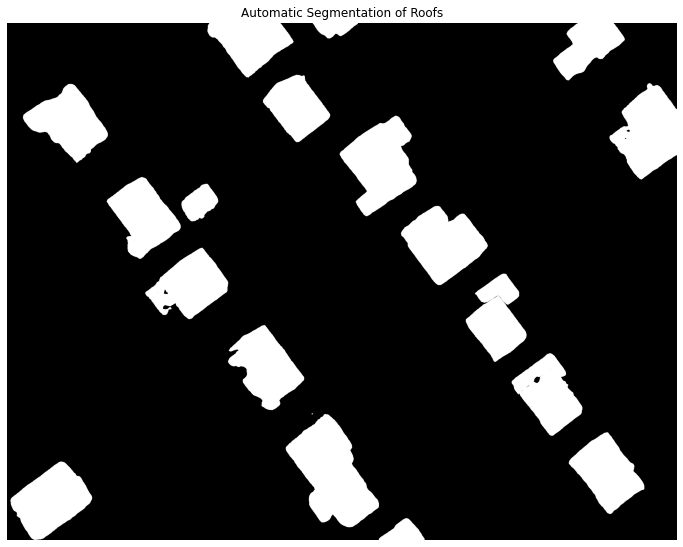

In [ ]:
sam.show_anns(
    cmap='Greys_r',
    add_boxes=False,
    alpha=1,
    title='Automatic Segmentation of Roofs',
    blend=False,
    output='generated-masking.tif',
)

Convert the result to a vector format.  

In [ ]:
# code untuk resize image
from PIL import Image

def resize_image(input_path, output_path, groundtruth_path):
    with Image.open(groundtruth_path) as gt_img:
      # Get the width and height of the ground truth image
      new_width, new_height = gt_img.size
      # Open the TIFF image
      with Image.open(input_path) as img:
          # Resize the image
          resized_img = img.resize((new_width, new_height))

          # Save the resized image
          resized_img.save(output_path)

# Example usage
input_tiff = "unet-hasil-crop-GAN-latest.tif" # hasil predicted
# input_tiff = "generated-masking.tif"
# input_tiff = "1-house-masking.tif"
output_tiff = "output-resize.tif" # hasil predicted di resize sesuai ukuran ground truth


# groundtruth_path = "generated-groundtruth-2.tif"
# groundtruth_path = "testinghd246small_groundtruth.tif"
# groundtruth_path = "1-house-masking-groundtruth-2.tif"
groundtruth_path = "unet-hasil-crop-groundtruth-4.tif"
resize_image(input_tiff, output_tiff, groundtruth_path)


true positive 22172
false positive 14917
true negative 170163
false negative 17748
TESTING F1 SCORE: 0.5758287992312587
Dice Coefficient: 0.5758287992312587
Precision: 0.5978052791932918
Recall: 0.5554108216432866
Accuracy: 0.8548222222222223


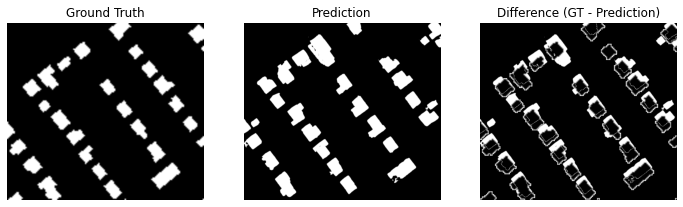

DONE


In [ ]:
# accuracy SAM
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def convert_to_grayscale(image_path):
    img = Image.open(image_path).convert("L")  # Convert to grayscale
    return np.array(img)

def calculate_metrics(gt_path, pred_path):
    # Convert both ground truth and prediction images to grayscale
    gt_img = convert_to_grayscale(gt_path)
    pred_img = convert_to_grayscale(pred_path)

    # Ensure the images have the same shape
    if gt_img.shape != pred_img.shape:
        raise ValueError("Ground truth and prediction images must have the same dimensions.")

    # Assuming pixel values of 1 represent the foreground (object) and 0 represent the background
    threshold = 0.5  # Adjust this threshold if needed

    # Convert to binary images based on the threshold
    gt_binary = (gt_img > threshold).astype(np.uint8)
    pred_binary = (pred_img > threshold).astype(np.uint8)

    # Calculate True Positives, False Positives, True Negatives, and False Negatives
    tp = np.sum((gt_binary == 1) & (pred_binary == 1))
    print("true positive",tp)
    fp = np.sum((gt_binary == 0) & (pred_binary == 1))
    print("false positive",fp)
    tn = np.sum((gt_binary == 0) & (pred_binary == 0))
    print("true negative",tn)
    fn = np.sum((gt_binary == 1) & (pred_binary == 0))
    print("false negative",fn)

    # Calculate metrics
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    dice_coefficient = (2 * precision * recall) / (precision + recall)
    specificity = tn / (tn + fp)
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    # Calculate Intersection over Union (IoU) Accuracy
    iou = tp / (tp + fp + fn)
    f1score = (2*tp)/(2*tp+fp+fn)
    print("TESTING F1 SCORE:",f1score)

    return dice_coefficient, precision, recall, specificity, accuracy, iou, gt_binary, pred_binary, gt_img, pred_img

# Example usage
prediction_path = output_tiff

dice_coefficient, precision, recall, specificity, accuracy, iou, gt_binary, pred_binary, gt_img, pred_img = calculate_metrics(groundtruth_path, prediction_path)

print(f"Dice Coefficient: {dice_coefficient}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")

# Display both images using matplotlib
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.title("Ground Truth")
plt.imshow(gt_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Prediction")
plt.imshow(pred_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Difference (GT - Prediction)")
plt.imshow(pred_img - gt_img, cmap='gray')
plt.axis('off')

plt.show()
print("DONE")

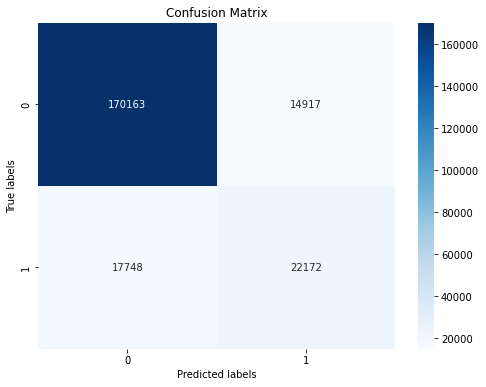

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(gt_binary.flatten(), pred_binary.flatten())

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Calculate precision, recall, and accuracy
# Calculate metrics
precision_library = precision_score(gt_binary.flatten(), pred_binary.flatten())
recall_library = recall_score(gt_binary.flatten(), pred_binary.flatten())
accuracy_library = accuracy_score(gt_binary.flatten(), pred_binary.flatten())

print("-----CARA LIBRARY----")
print("Precision Library:", precision_library)
print("Recall Library:", recall_library)
print("Accuracy Library:", accuracy_library)

print("-----CARA MANUAL----")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"IoU: {iou}")

-----CARA LIBRARY----
Precision Library: 0.5978052791932918
Recall Library: 0.5554108216432866
Accuracy Library: 0.8548222222222223
-----CARA MANUAL----
Precision: 0.5978052791932918
Recall: 0.5554108216432866
Accuracy: 0.8548222222222223
IoU: 0.4043255466199829


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming gt_binary and pred_binary are your ground truth and predicted binary matrices

# Flatten the matrices
gt_flat = gt_binary.flatten()
pred_flat = pred_binary.flatten()

# Calculate confusion matrix
conf_matrix = confusion_matrix(gt_flat, pred_flat)

# Calculate true positives, false positives, and false negatives
tp = conf_matrix[1, 1]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]

# Calculate Intersection over Union (IoU)
iou = tp / (tp + fp + fn)

print("Intersection over Union (IoU):", iou)

Intersection over Union (IoU): 0.4043255466199829


In [ ]:
# sam.raster_to_vector("roofs.tif", "roofs.shp")
# sam.raster_to_vector("testinghd246small-GAN.tif", "testinghd246small-GAN.shp")
# sam.raster_to_vector("unet-hasil-crop-masking.tif", "unet-hasil-crop-masking.shp")
# sam.raster_to_vector("mask_gan_image.tif", "mask_gan_image.shp")
# sam.raster_to_vector("generate-from-google.tif","generate-from-google.shp")
# sam.raster_to_vector("input-generated-mask-gan.tif","input-generated-mask-gan.shp")
sam.raster_to_vector("unet-hasil-crop-vers-GAN.tif","unet-hasil-crop-vers-GAN.shp")


Show the results on the interactive map.

## Interactive segmentation

GeoDataFrame with Areas:
      value                                           geometry  id        area
0   65535.0  POLYGON ((-7921929.849 5204811.152, -7921929.5...   0    0.027866
1   65535.0  POLYGON ((-7922050.119 5204808.614, -7922049.9...   1    0.011146
2   65535.0  POLYGON ((-7922011.671 5204820.484, -7921992.4...   2  172.495596
3   65535.0  POLYGON ((-7921930.670 5204806.524, -7921930.5...   3    0.027866
4   65535.0  POLYGON ((-7922052.807 5204805.628, -7922052.5...   4    0.312098
5   65535.0  POLYGON ((-7921927.236 5204820.484, -7921921.3...   5  164.977372
6   65535.0  POLYGON ((-7921934.104 5204806.524, -7921933.9...   6   53.781219
7   65535.0  POLYGON ((-7921918.651 5204806.001, -7921918.4...   7   42.623706
8   65535.0  POLYGON ((-7922025.184 5204784.352, -7922025.1...   8    0.022293
9   65535.0  POLYGON ((-7921981.511 5204782.411, -7921981.4...   9    0.468147
10  65535.0  POLYGON ((-7922042.728 5204808.091, -7922042.6...  10  507.421618
11  65535.0  POLYGON ((-792

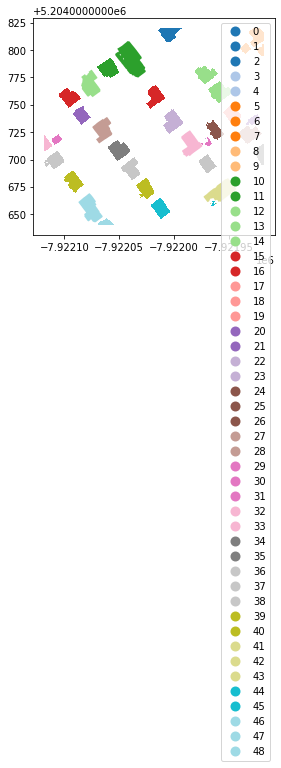

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Replace 'path/to/your/vector.shp' with the actual path to your Shapefile
# shapefile_path = 'roofs.shp'
# shapefile_path = 'input-generated-mask-gan.shp'
shapefile_path = 'unet-hasil-crop-vers-GAN.shp'

# Read the Shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)
# Create a new column 'new_column' with values equal to the index
gdf['id'] = gdf.index

# Calculate the area for each polygon and create a new column 'area'
gdf['area'] = gdf.geometry.area

# Print the GeoDataFrame with the new 'area' column
print("GeoDataFrame with Areas:")
print(gdf)

# Calculate the total sum of the areas
total_area = gdf['area'].sum()

# Print the total sum of the areas
print("Total Area:", total_area)

# Plot the GeoDataFrame with different colors based on the "value" column
gdf.plot(column="id", legend=True, categorical=True, cmap="tab20")

# Show the plot
plt.show()


**Counting Total Area Predicted Mask**

**Menghitung Solar PV**

In [ ]:
# Rumus
# Cr = (Cm/1000)*(RCR*total_area/(1.487*0.992))
Cr = (200/1000)*(0.85*total_area/(1.487*0.992))
print("hasil Cr (kWp):",Cr)

hasil Cr (kWp): 693.4420636181004


In [ ]:
# Rumus
# Energy = Cr*(GSR)*D

# Energy yang dihasilkan
Energy = Cr*(117.75 )*0.75
print("hasil Energy listrik (kWh):",Energy,"per monthly")

hasil Energy listrik (kWh): 30632.183613956004 per monthly
